In [16]:
!pip install quandl
!pip install plotly
!pip install pandas_datareader

In [17]:
import pandas as pd #for reading and working with data
import matplotlib.pyplot as plt #for visuals
import seaborn as sns #for visuals
import numpy as np #for doing math/stat calculations, working with arrays

import quandl #for downloading data from Quandl website
from pandas_datareader import data #for downloading data from Yahoo Finance website

##plotly is for interactive plotting
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go #the basic charts that we will use are mainly stored under graph_objs
init_notebook_mode(connected=True) #if we want the charts to be displayed in JN

## Problem 1

In [18]:
data_salary=pd.read_csv('salary.csv')

In [19]:
data_salary.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad            NaN        Widowed   
1   82   Private  132870       HS-grad            NaN        Widowed   
2   66         ?  186061  Some-college           10.0        Widowed   
3   54   Private  140359       7th-8th            NaN       Divorced   
4   41   Private  264663  Some-college           10.0      Separated   

          occupation   relationship   race   Geder  capital.gain  \
0                NaN  Not-in-family  White  Female           NaN   
1    Exec-managerial  Not-in-family  White  Female           NaN   
2                NaN      Unmarried  Black  Female           NaN   
3  Machine-op-inspct      Unmarried  White  Female           NaN   
4     Prof-specialty      Own-child  White  Female           NaN   

   capital.loss  hours.per.week native.country income  
0        4356.0            40.0  United-States  <=50K  
1        4356.0            18.0  United-States  <=50K  
2        4356.0            40.0  United-States  <=50K  
3        3900.0            40.0  United-States  <=50K  
4        3900.0            40.0  United-States  <=50K

## Problem 2

In [20]:
data_salary.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num     14754
marital.status        0
occupation         1843
relationship          0
race                  0
Geder                 0
capital.gain      29849
capital.loss      31042
hours.per.week      458
native.country      583
income                0
dtype: int64

education.num has 14754 missing values, occupation has 1843, capital.gain has 29849, capital.loss has 31042, hours.per.week has 458 and native country has 583.

## Problem 4

In [21]:
data_salary['workclass'] = data_salary['workclass'].replace(['?'],'NA')


In [22]:
data_salary.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90        NA   77053       HS-grad            NaN        Widowed   
1   82   Private  132870       HS-grad            NaN        Widowed   
2   66        NA  186061  Some-college           10.0        Widowed   
3   54   Private  140359       7th-8th            NaN       Divorced   
4   41   Private  264663  Some-college           10.0      Separated   

          occupation   relationship   race   Geder  capital.gain  \
0                NaN  Not-in-family  White  Female           NaN   
1    Exec-managerial  Not-in-family  White  Female           NaN   
2                NaN      Unmarried  Black  Female           NaN   
3  Machine-op-inspct      Unmarried  White  Female           NaN   
4     Prof-specialty      Own-child  White  Female           NaN   

   capital.loss  hours.per.week native.country income  
0        4356.0            40.0  United-States  <=50K  
1        4356.0            18.0  United-States  <=50K  
2        4356.0            40.0  United-States  <=50K  
3        3900.0            40.0  United-States  <=50K  
4        3900.0            40.0  United-States  <=50K

In [23]:
data_salary.drop(columns=['education.num'],axis=1,inplace=True)
data_salary.drop(columns=['occupation'],axis=1,inplace=True)
data_salary.drop(columns=['capital.gain'],axis=1,inplace=True)
data_salary.drop(columns=['capital.loss'],axis=1,inplace=True)

In [24]:
data_salary.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital.status',
       'relationship', 'race', 'Geder', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [25]:
data_salary.dropna(inplace=True)

In [26]:
data_salary.shape

(31527, 11)

The data without missing value has 31527 rows and 11 columns.

## Problem 5

In [27]:
data_salary['marital.status'] = data_salary['marital.status'].replace(['.'],'_')


In [28]:
data_salary['marital.status'].describe()

count                  31527
unique                     7
top       Married-civ-spouse
freq                   14522
Name: marital.status, dtype: object

## Problem 6

In [43]:
data_numeric=data_salary.select_dtypes(exclude='object')

In [44]:
data_numeric.corr()

age    fnlwgt  hours.per.week
age             1.000000 -0.077234        0.103418
fnlwgt         -0.077234  1.000000       -0.023476
hours.per.week  0.103418 -0.023476        1.000000

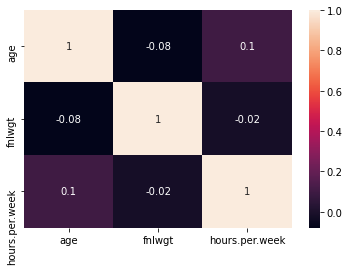

In [45]:

sns.heatmap(data_salary.corr().round(2) 
           ,annot=True 
           )

plt.show()

## Problem 7

In [46]:
data_salary.age.mean()

38.45196181051163

In [47]:
data_salary.age.median()

37.0

In [48]:
data_salary.age.min()

17

In [49]:
data_salary.age.max()

90

In [50]:
data_salary.age.std()

13.457003406740395

## Problem 8

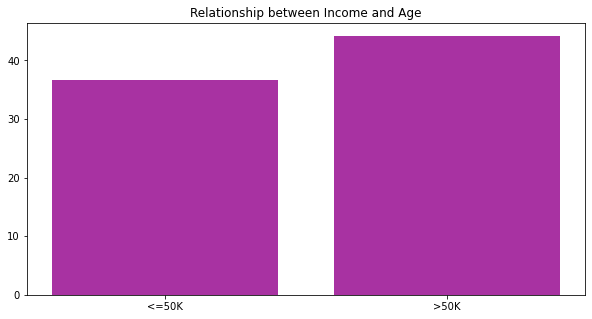

In [51]:
plt.figure(figsize=(10,5))

plt.bar(data_salary.income.unique(),
       data_salary.groupby(['income'])['age'].mean(),
       color='#a832a2')
plt.title("Relationship between Income and Age")        
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



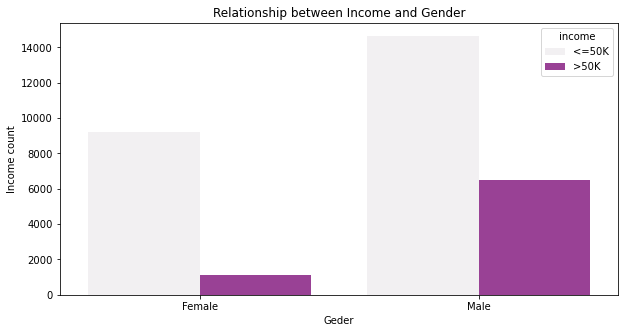

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(data_salary.Geder, hue=data_salary['income'], color='#a832a2')
plt.xlabel('Geder')
plt.ylabel('Income count')
plt.title('Relationship between Income and Gender')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



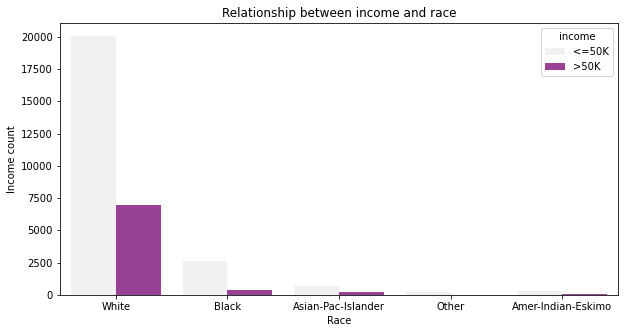

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data_salary.race, hue=data_salary['income'], color='#a832a2')
plt.xlabel('Race')
plt.ylabel('Income count')
plt.title('Relationship between income and race')
plt.show()

In [54]:
data_salary=data_salary.rename({'hours.per.week':'hours'},axis=1)

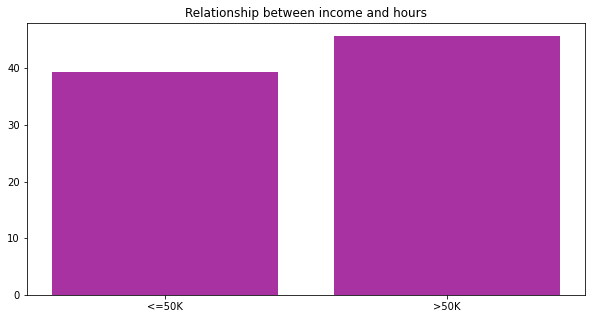

In [55]:
plt.figure(figsize=(10,5))

plt.bar(data_salary.income.unique(),
       data_salary.groupby(['income'])['hours'].mean(),
       color='#a832a2')
plt.title("Relationship between income and hours")        
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



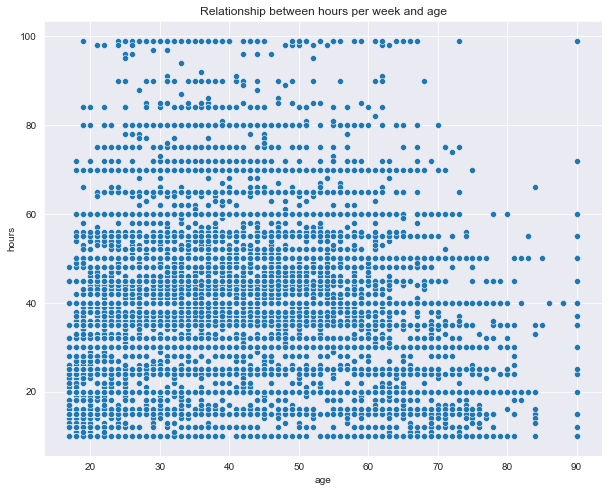

In [56]:
plt.figure(figsize=(10,8)) #figure size

sns.set_style('darkgrid') #setting style for the charts

sns.scatterplot(data_salary.age, #X-axis values
            data_salary.hours #Y-axis values
               )
plt.title("Relationship between hours per week and age")
plt.show()

## Problem 9

In [57]:
data_numeric=data_salary.select_dtypes(exclude='object')
data_numeric.head()

age  fnlwgt  hours
0   90   77053   40.0
1   82  132870   18.0
2   66  186061   40.0
3   54  140359   40.0
4   41  264663   40.0

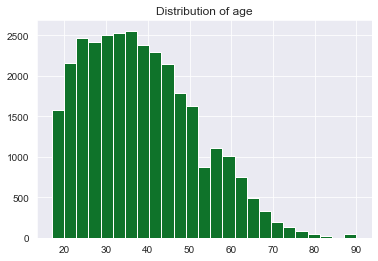

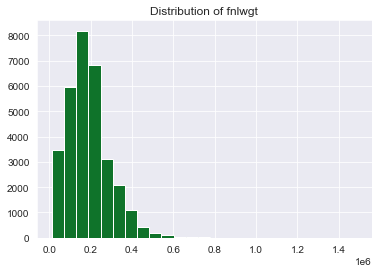

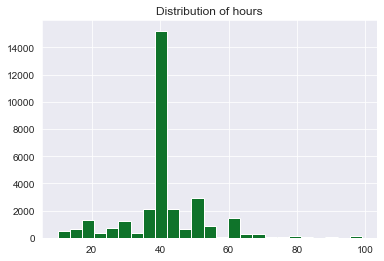

In [58]:
for i in data_numeric.columns:
    plt.hist(data_numeric[i],
         color='#0f732a',
         bins=25
        )
    plt.title(f"Distribution of {i}")
    plt.show()

## Problem 10

Looking at the figures above, we can see that people who are 35+ are earning more that people under age 35. There are more males who rarn higher salaries than females. Additionaly as we can see in the third figure white people tend to earn higher salaries. Those who work for more hours earn more

## Problem 11

In [59]:
data_amazon=data.DataReader(name='AMZN', 
                        data_source='yahoo', 
                        start='2008-01-01', end='2021-01-01', 
                        pause=1 
                        )

In [60]:
data_amazon.head()

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2008-01-02  97.430000  94.699997  95.349998  96.250000  13858700  96.250000
2008-01-03  97.250000  94.519997  96.059998  95.209999   9122500  95.209999
2008-01-04  93.400002  88.500000  93.260002  88.790001  10270000  88.790001
2008-01-07  90.570000  85.470001  88.620003  88.820000   9981600  88.820000
2008-01-08  91.830002  86.930000  87.550003  87.879997  12283300  87.879997

In [61]:
data_pepsi=data.DataReader(name='PEP', 
                        data_source='yahoo', 
                        start='2008-01-01', end='2021-01-01', 
                        pause=1 
                        )

In [62]:
data_pepsi.head()


High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2008-01-02  76.410004  74.709999  76.410004  75.290001  4899100.0  50.620384
2008-01-03  76.839996  75.290001  75.389999  75.779999  4728400.0  50.949837
2008-01-04  76.400002  75.290001  75.290001  75.550003  5493200.0  50.795216
2008-01-07  77.440002  75.699997  75.860001  77.320000  7584800.0  51.985252
2008-01-08  78.989998  77.169998  77.849998  77.940002  7153800.0  52.402103

In [63]:
data_chevron=data.DataReader(name='CVX', 
                        data_source='yahoo', 
                        start='2008-01-01', end='2021-01-01', 
                        pause=1 
                        )

In [64]:
data_chevron.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2008-01-02  94.690002  92.709999  93.959999  93.459999   9058000.0  55.471699
2008-01-03  94.839996  93.459999  93.800003  94.610001  10479200.0  56.154259
2008-01-04  95.209999  93.199997  93.879997  93.349998  13103800.0  55.406391
2008-01-07  93.739998  91.150002  93.739998  92.129997  12892200.0  54.682297
2008-01-08  93.379997  90.580002  92.410004  90.949997  10987700.0  53.981922

In [65]:
data_pins=data.DataReader(name='PINS', 
                        data_source='yahoo', 
                        start='2008-01-01', end='2021-01-01', 
                        pause=1 
                        )

In [66]:
data_pins.head()

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2019-04-18  25.180000  23.049999  23.750000  24.400000  87109500  24.400000
2019-04-22  25.680000  23.570000  24.620001  24.990000  19746800  24.990000
2019-04-23  27.750000  25.230000  25.379999  25.850000  19245400  25.850000
2019-04-24  27.030001  25.933001  26.500000  26.799999   9477200  26.799999
2019-04-25  29.400000  26.670000  27.450001  28.799999  16648300  28.799999

In [67]:
data_apple=data.DataReader(name='AAPL', 
                        data_source='yahoo', 
                        start='2008-01-01', end='2021-01-01', 
                        pause=1 
                        )

In [68]:
data_apple.head()

High       Low      Open     Close        Volume  Adj Close
Date                                                                       
2008-01-02  7.152143  6.876786  7.116786  6.958571  1.079179e+09   5.983694
2008-01-03  7.049643  6.881786  6.978929  6.961786  8.420664e+08   5.986459
2008-01-04  6.892857  6.388929  6.837500  6.430357  1.455832e+09   5.529482
2008-01-07  6.557143  6.079643  6.473214  6.344286  2.072193e+09   5.455470
2008-01-08  6.516429  6.100000  6.433571  6.116071  1.523816e+09   5.259228

## Problem 12

In [69]:
tickers=['AMZN','PEP','CVX','PINS','AAPL']

In [70]:
data_stocks=data.DataReader(name=tickers,
                           data_source='yahoo',
                           start='2008-01-01',
                           end='2021-01-01',
                           pause=0.1
                           )

In [71]:
data_stocks.head()

Attributes  Adj Close                                           Close  \
Symbols          AMZN        PEP        CVX PINS      AAPL       AMZN   
Date                                                                    
2008-01-02  96.250000  50.620384  55.471699  NaN  5.983694  96.250000   
2008-01-03  95.209999  50.949837  56.154259  NaN  5.986459  95.209999   
2008-01-04  88.790001  50.795216  55.406391  NaN  5.529482  88.790001   
2008-01-07  88.820000  51.985252  54.682297  NaN  5.455470  88.820000   
2008-01-08  87.879997  52.402103  53.981922  NaN  5.259228  87.879997   

Attributes                                       ...       Open             \
Symbols           PEP        CVX PINS      AAPL  ...       AMZN        PEP   
Date                                             ...                         
2008-01-02  75.290001  93.459999  NaN  6.958571  ...  95.349998  76.410004   
2008-01-03  75.779999  94.610001  NaN  6.961786  ...  96.059998  75.389999   
2008-01-04  75.550003  93.349998  NaN  6.430357  ...  93.260002  75.290001   
2008-01-07  77.320000  92.129997  NaN  6.344286  ...  88.620003  75.860001   
2008-01-08  77.940002  90.949997  NaN  6.116071  ...  87.550003  77.849998   

Attributes                                Volume                              \
Symbols           CVX PINS      AAPL        AMZN        PEP         CVX PINS   
Date                                                                           
2008-01-02  93.959999  NaN  7.116786  13858700.0  4899100.0   9058000.0  NaN   
2008-01-03  93.800003  NaN  6.978929   9122500.0  4728400.0  10479200.0  NaN   
2008-01-04  93.879997  NaN  6.837500  10270000.0  5493200.0  13103800.0  NaN   
2008-01-07  93.739998  NaN  6.473214   9981600.0  7584800.0  12892200.0  NaN   
2008-01-08  92.410004  NaN  6.433571  12283300.0  7153800.0  10987700.0  NaN   

Attributes                
Symbols             AAPL  
Date                      
2008-01-02  1.079179e+09  
2008-01-03  8.420664e+08  
2008-01-04  1.455832e+09  
2008-01-07  2.072193e+09  
2008-01-08  1.523816e+09  

[5 rows x 30 columns]

In [72]:
data_stocks.columns=data_stocks.columns.map('_'.join)

In [73]:
data_stocks.head()

Adj Close_AMZN  Adj Close_PEP  Adj Close_CVX  Adj Close_PINS  \
Date                                                                       
2008-01-02       96.250000      50.620384      55.471699             NaN   
2008-01-03       95.209999      50.949837      56.154259             NaN   
2008-01-04       88.790001      50.795216      55.406391             NaN   
2008-01-07       88.820000      51.985252      54.682297             NaN   
2008-01-08       87.879997      52.402103      53.981922             NaN   

            Adj Close_AAPL  Close_AMZN  Close_PEP  Close_CVX  Close_PINS  \
Date                                                                       
2008-01-02        5.983694   96.250000  75.290001  93.459999         NaN   
2008-01-03        5.986459   95.209999  75.779999  94.610001         NaN   
2008-01-04        5.529482   88.790001  75.550003  93.349998         NaN   
2008-01-07        5.455470   88.820000  77.320000  92.129997         NaN   
2008-01-08        5.259228   87.879997  77.940002  90.949997         NaN   

            Close_AAPL  ...  Open_AMZN   Open_PEP   Open_CVX  Open_PINS  \
Date                    ...                                               
2008-01-02    6.958571  ...  95.349998  76.410004  93.959999        NaN   
2008-01-03    6.961786  ...  96.059998  75.389999  93.800003        NaN   
2008-01-04    6.430357  ...  93.260002  75.290001  93.879997        NaN   
2008-01-07    6.344286  ...  88.620003  75.860001  93.739998        NaN   
2008-01-08    6.116071  ...  87.550003  77.849998  92.410004        NaN   

            Open_AAPL  Volume_AMZN  Volume_PEP  Volume_CVX  Volume_PINS  \
Date                                                                      
2008-01-02   7.116786   13858700.0   4899100.0   9058000.0          NaN   
2008-01-03   6.978929    9122500.0   4728400.0  10479200.0          NaN   
2008-01-04   6.837500   10270000.0   5493200.0  13103800.0          NaN   
2008-01-07   6.473214    9981600.0   7584800.0  12892200.0          NaN   
2008-01-08   6.433571   12283300.0   7153800.0  10987700.0          NaN   

             Volume_AAPL  
Date                      
2008-01-02  1.079179e+09  
2008-01-03  8.420664e+08  
2008-01-04  1.455832e+09  
2008-01-07  2.072193e+09  
2008-01-08  1.523816e+09  

[5 rows x 30 columns]

In [74]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_AMZN,
                        mode='lines',
                        name='Close Price of AMZN'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_PEP,
                        mode='lines',
                        name='Close Price of PEP'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_CVX,
                        mode='lines',
                        name='Close Price of CVX'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_PINS,
                        mode='lines',
                        name='Close Price of PINS'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_AAPL,
                        mode='lines',
                        name='Close Price of AAPL'))

fig.update_layout(title='Comparison of Close Prices Between Stocks')

fig.show()

In [75]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_AMZN,
                        mode='lines',
                        name='Close Price of AMZN'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_PEP,
                        mode='lines',
                        name='Close Price of PEP'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_CVX,
                        mode='lines',
                        name='Close Price of CVX'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_PINS,
                        mode='lines',
                        name='Close Price of PINS'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_AAPL,
                        mode='lines',
                        name='Close Price of AAPL'))

fig.update_layout(title='Comparison of Close Prices Between Stocks')

fig.show()

## Problem 13

The vast majority of people are working for 40 hours, most of them are middle age. There are considerably fewer employees whose age is 55+ and less whose age is 20-30.

In [76]:
for i in data_numeric.columns:
    fig = px.histogram(data_frame=data_numeric,x=i)
    fig.update_layout(
    title=i,
    height=500,
    width=500)
    fig.show()